Importing the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

1) Loading the dataset and finding the correlation

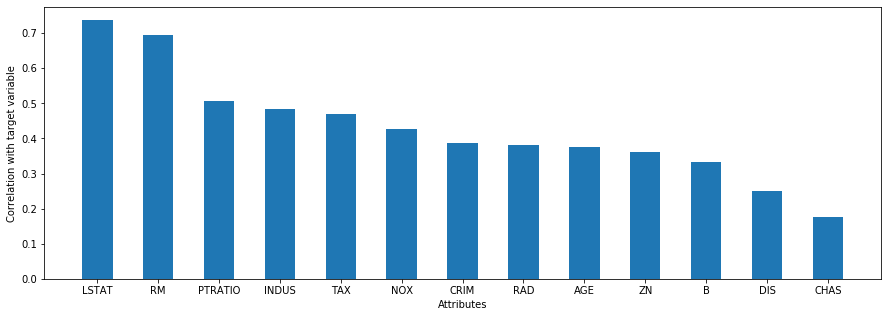

In [2]:
boston=load_boston()
features=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=['target'])
df=pd.concat([features,target],axis=1)
df.describe().round(decimals=2)

corr=df.corr('pearson')
corrs=[abs(corr[attr]['target']) for attr in list(features)]
l=list(zip(corrs,list(features)))
l.sort(key=lambda x:x[0],reverse=True)
corrs,labels=list(zip(*l))

index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variable')
plt.xticks(index,labels)
plt.show()

2)Normalization of data and Splitting the dataset

In [9]:
X=df['LSTAT'].values
Y=df['target'].values

x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.15)

3) Training the Linear regression model and finding M and c Values. 

In [71]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)

def update(m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e<error_threshold:
            print('Error less than threshold,stop gradient descent')
            break
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

init_m=0.9
init_c=0.5
learning_rate=0.001
iterations=70
error_threshold=0.0001
m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,
                ytrain,learning_rate,iterations,error_threshold)

4) Data Visualization

Data Animation

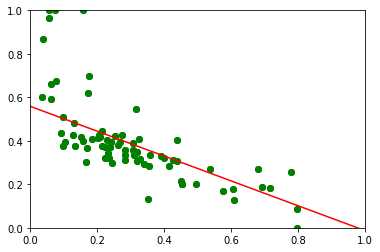

In [72]:
mc_values_anim=mc_values[0:250:5]
fig,ax=plt.subplots()
ln,=plt.plot([],[],'ro-',animated=True)
def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,
def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5,m*-0.5+c
    x2,y2=1.5,m*1.5+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,
anim=FuncAnimation(fig,update_frame,
        frames=range(len(mc_values_anim)),init_func=init,blit=True)
HTML(anim.to_html5_video())

Error curve

Text(0.5, 0, 'Iterations')

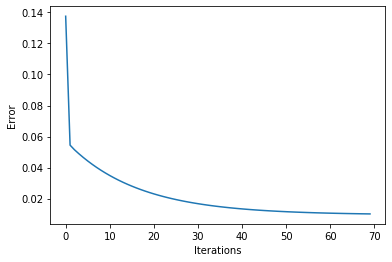

In [73]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

5) Prediction of prices

In [74]:
predicted=(m*xtest)+c
mean_absolute_error(ytest,predicted)

0.09105766169369842

Denormalize the values

In [75]:
xtest_scaled=x_scaler.inverse_transform(xtest.reshape(-1,1))
ytest_scaled=y_scaler.inverse_transform(ytest.reshape(-1,1))
predicted_scaled=y_scaler.inverse_transform(predicted.reshape(-1,1))
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),
               columns=['x','y','predicted'])
p=p.round(decimals=2)
p.head()

,x,y,predicted
0,3.95,31.6,28.83
1,5.08,24.6,28.00
2,4.59,35.4,28.36
3,9.50,22.0,24.74
4,7.44,50.0,26.26
